## 목표 
- 타이타닉 데이터를 학습해서 생존자/사망자 예측하기
- 머신러닝 전체과정 흐름을 경험해보기

#### 머신러닝 과정
1. 문제정의
2. 데이터 수집
3. 데이터 전처리(데이터 가공)
4. 탐색적 데이터 분석(EDA)
5. 모델선택 및 하이퍼파라미터 조정
6. 모델 학습
7. 모델 평가(점수가 낮은경우 2(데이터수집) 또는 3(전처리) 부터 다시반복)
8. 서비스화

## 1.문제정의
- 탑승객 데이터를 바탕으로 생존자/사망자 분류 (지도학습)

## 2.데이터 수집
- Kaggle 사이트로부터 train, test, gender_submission 다운로드

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('./data/titanic/train.csv')
test = pd.read_csv('./data/titanic/test.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


## 3.데이터 전처리 
- 컬럼 삭제
- 결측치 채우기
- 새로운 컬럼 만들기 
- 범주형 데이터 및 연속형 데이터
- 모든 object 타입을 숫자형으로 변경 등

In [4]:
train.drop('PassengerId', axis = 1, inplace = True)

In [5]:
test.drop('PassengerId', axis = 1, inplace = True)

#train에 시행한 내용을 test에도 똑같이 적용해줘야 함

#### 문제와 답 나누기

In [6]:
X_train = train.iloc[: ,1:]   #문제
y_train = train.iloc[: , 0]   #답

In [7]:
X_test = test  #문제 X_test = test.iloc[: , :]

In [8]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


- Age , Cabin , Embarked 결측치 확인됨
- 데이터를 삭제하고 학습시킬지 결측치를 채워넣을지 결정!

### Embarked 결측치 채우기

In [9]:
# 유니크 값 확인하기 , 결측치를 가장 많은 S 로 채워보자
X_train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [10]:
# 결측치 채우기 .fillna(채울 값, inplace = True)
X_train['Embarked'].fillna('S', inplace = True)

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


### Fare 결측치 채우기

In [12]:
# X_train 변경시 X_test 도 변경필요
# Age , Fare , Cabin 결측치로 확인됨
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       332 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      417 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


In [13]:
X_test['Fare'].value_counts()  #결측치를 뭘로 채울지 불명확

7.7500      21
26.0000     19
8.0500      17
13.0000     17
7.8958      11
            ..
31.6833      1
16.0000      1
53.1000      1
146.5208     1
20.2500      1
Name: Fare, Length: 169, dtype: int64

In [14]:
X_test.describe()
#평균 값 35.627188 을 사용시 이상치에 민감
# 50% -> 14.454200 으로 사용해보자

,Pclass,Age,SibSp,Parch,Fare
count,418.000000,332.000000,418.000000,418.000000,417.000000
mean,2.265550,30.272590,0.447368,0.392344,35.627188
std,0.841838,14.181209,0.896760,0.981429,55.907576
min,1.000000,0.170000,0.000000,0.000000,0.000000
25%,1.000000,21.000000,0.000000,0.000000,7.895800
50%,3.000000,27.000000,0.000000,0.000000,14.454200
75%,3.000000,39.000000,1.000000,0.000000,31.500000
max,3.000000,76.000000,8.000000,9.000000,512.329200


In [15]:
X_test['Fare'].fillna(14.454200 , inplace=True)

##  age 결측치 채우기

In [16]:
#  3   Age       714 non-null    float64  
# age컬럼간의 상관관계를 통해서 채우기
X_train.corr()

,Pclass,Age,SibSp,Parch,Fare
Pclass,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,-0.549500,0.096067,0.159651,0.216225,1.000000


In [17]:
# 상관관계가 가장 높은 Pclass
X_train[['Pclass','Age']]

,Pclass,Age
0,3,22.0
1,1,38.0
2,3,26.0
3,1,35.0
4,3,35.0
...,...,...
886,2,27.0
887,1,19.0
888,3,NaN
889,1,26.0


In [18]:
#Pclass 유니크 값은 1 , 2, 3 등석 / 인덱스값으로 확인됨
# .median() 중위수(중앙값)
X_train[['Pclass','Age']].groupby(by='Pclass').median()

,Age
Pclass,
1,37.0
2,29.0
3,24.0


In [19]:
# 생존과 사망에 영향을 끼친 성별로 한번 더 세분화
#.groupby(by=['Pclass','Sex']) 첫번째 기준 Pclass 두번째 기준 Sex
# 데이터 프레임 형태
age_table = X_train[['Pclass','Sex','Age',]].groupby(by=['Pclass','Sex']).median()
age_table

Age
Pclass Sex         
1      female  35.0
       male    40.0
2      female  28.0
       male    30.0
3      female  21.5
       male    25.0

In [20]:
#시리즈 형태로 값을 파악해서 바로 시리즈 형태로 return 값을 준다?
#return age_table.loc[person['Pclass'], person['Sex']][0]
#       age_table.loc[1,               'male']      [0]

In [21]:
#결측치 채우는 함수생성
def fill_age(person):
    if np.isnan(person['Age']):
        #결측치에 대한 명령문이 실행 , 결측치 조건에 해당하는 값으로 return
        # return 결측치 채워줄 값 
        #.loc[결측치에 해당하는 성별]
        #                    결측치의 Pclass  , 결측치의 성별
        return age_table.loc[person['Pclass'], person['Sex']][0]
    else:
        #결측치가 아닌 데이터에 대한 명령문이 실행
        return person['Age']

In [22]:
#결측치 채우는 함수 적용
# apply 함수 사용 , 주로 데이터 프레임에서 활용
X_train['Age'] = X_train.apply(fill_age, axis = 1)

In [23]:
# 기존 info 값 => 3   Age       714 non-null    float64
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Name      891 non-null    object 
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  891 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 69.7+ KB


In [24]:
# X_test에 대해서도 동일하게 적용해줌
X_test['Age'] = X_test.apply(fill_age, axis = 1)

In [25]:
# 기존 값 => 3   Age       332 non-null    float64
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Name      418 non-null    object 
 2   Sex       418 non-null    object 
 3   Age       418 non-null    float64
 4   SibSp     418 non-null    int64  
 5   Parch     418 non-null    int64  
 6   Ticket    418 non-null    object 
 7   Fare      418 non-null    float64
 8   Cabin     91 non-null     object 
 9   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(5)
memory usage: 32.8+ KB


### Cabin 채우기
- Cabin의 범주값이 너무 많기 때문에 종류를 줄여보자.
- 결측치도 하나의 데이터가 될 수 있다.

In [26]:
X_train['Cabin'].value_counts()
#결측치 관련해서 불명확 

B96 B98        4
G6             4
C23 C25 C27    4
F33            3
D              3
              ..
E10            1
C91            1
C90            1
C95            1
E34            1
Name: Cabin, Length: 147, dtype: int64

In [27]:
X_train['Cabin'].unique()
#데이터가 많아서 변경필요
#같은 구역별로 숫자는 빼고 C구역, B구역 이런식으로 알파벳만 빼내보자

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [28]:
X_train['Cabin'] = X_train['Cabin'].str[0]

In [29]:
X_train['Cabin'].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [30]:
# 구역별로 좀더 명확한 자료 확인되지만 결과값이 비슷함
# 결측치를 하나의 데이터로 만들어 버리쟈!! 
X_train['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [31]:
# M이라는 값으로 결측치를 채워 하나의 데이터로 만들어 보자
X_train['Cabin'].fillna('M', inplace = True)

In [32]:
X_train['Cabin'].value_counts()

M    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [33]:
#X_test 의 결측치에 대해서도 채워보자!!

In [34]:
X_test['Cabin'].str[0]
X_test['Cabin'] = X_test['Cabin'].str[0]
X_test['Cabin'].fillna('M', inplace = True)

In [35]:
X_test['Cabin'].value_counts()

M    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: Cabin, dtype: int64

## 탐색적 데이터 분석 (EDA)
- 훈련데이터로 탐색
- Bar chart 활용하여 탐색

#### Cabin 시각화

In [36]:
#기존 제거한 생존여부 컬럼을 다시 만들어서 새로운 변수에 넣어주자
#.concat([A, B]) 데이터 프레임을 합칠때 사용, 복수개의 변수를 사용하기 때문에 
# 대괄호 사용해줘야함 axis = 1 -> 열로 함쳐지게 하기 위해 사용
tr = pd.concat([X_train,train[['Survived']]], axis = 1)

<AxesSubplot:xlabel='Cabin', ylabel='count'>

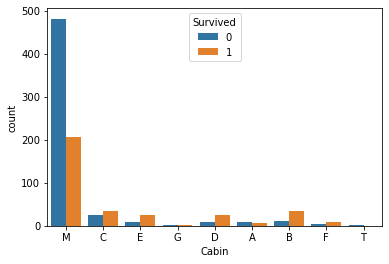

In [37]:
sns.countplot(data = tr,
            x = 'Cabin',
            hue = 'Survived')

In [38]:
train[['Survived']]

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


- 시각화 내용으로 확인할 수 있는 것!! (0-죽음 , 1-생존)
- M에서 상대적으로 더 많은 사람이 죽었다.
- 모델에게 학습시켜도 의마가 있을 수 있겟다.

#### Pclass 시각화

<AxesSubplot:xlabel='count', ylabel='Pclass'>

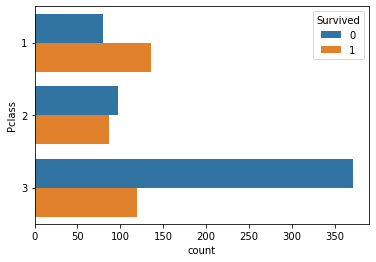

In [39]:
sns.countplot(data = tr,
             y = 'Pclass',
             hue = 'Survived')

#1등급 사람은 상대적으로 더 많이 살아남았다.
#3등급 사람은 많으 사람이 사망했다.

## Pclass 와 Cabin 시각화

<AxesSubplot:xlabel='Cabin', ylabel='count'>

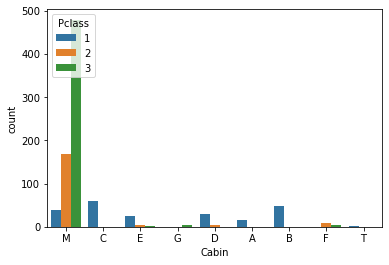

In [40]:
sns.countplot(data = tr,
             x = 'Cabin',
             hue = 'Pclass')

#A, B, C 는 1등석 사람들이 탔다.
#M은 3등급 사람들이 많이 탑승했다. --> 3등석 사람들이 많이 죽어서 정보가 손실?

## Embarked , Sex 시각화

<AxesSubplot:xlabel='Embarked', ylabel='count'>

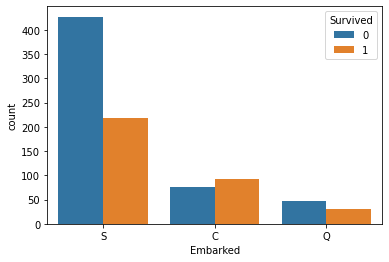

In [41]:
sns.countplot(data = tr,
             x = 'Embarked',
             hue = 'Survived')

<AxesSubplot:xlabel='Embarked', ylabel='count'>

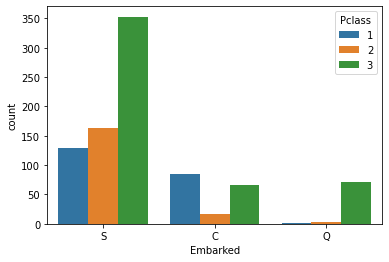

In [42]:
sns.countplot(data = tr,
             x = 'Embarked',
             hue = 'Pclass')

<AxesSubplot:xlabel='Sex', ylabel='count'>

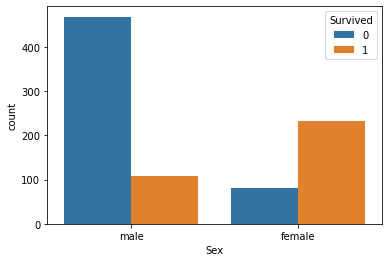

In [43]:
sns.countplot(data = tr,
             x = 'Sex',
             hue = 'Survived')

## Age 시각화

<AxesSubplot:xlabel='Sex', ylabel='Age'>

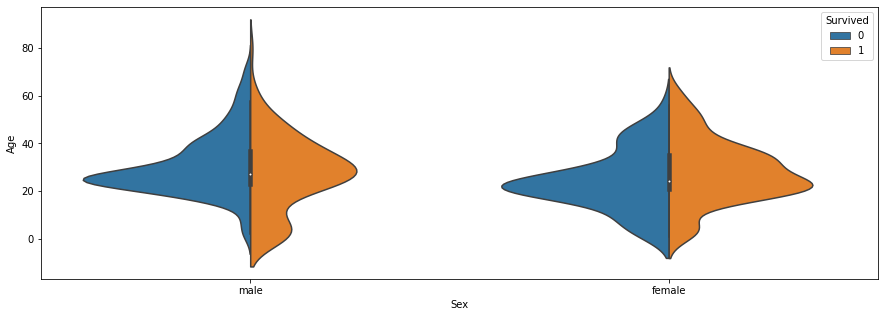

In [44]:
plt.figure(figsize=(15, 5))
sns.violinplot(data = tr,
              y = 'Age',
              x = 'Sex',
              hue = 'Survived',
              split = True)

- 남자는 20대가 많아 사망했다.
- 어린아이 중에서는 남자아이가 여자아이에 비해 많이 살았다.(시배적 배경추측)

### 특성공학
- 기존에 존재하는 특성들을 이용해 다른 특성을 만드는 기법

- SibSp : 타이타닉 호에 동승한 자매 및 배우자의 수 
- Parch : 타이타닉 호에 동승한 부모 및 자식의 수

- SibSp 와 Parch 를 합하여 가족이라는 새로운 컬럼을 생성해보자!
- 새로운 컬럼 생성 = 특성 생성 -> 특성이 많아짐 -> 과대적합

In [45]:
# 가족에는 나 자신도 포함되기 때문에 +1 을 해주자
# 생존여부 포함해서 만들어준 tr 을 X_train 대신 넣음
tr['Family'] = tr['SibSp'] + tr['Parch'] + 1 
X_test['Family'] = X_test['SibSp'] + X_test['Parch'] + 1 

<AxesSubplot:xlabel='Family', ylabel='count'>

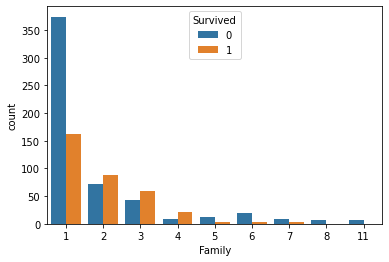

In [46]:
sns.countplot(data = tr, 
             x = 'Family', 
             hue = 'Survived')

- 1명 일때 죽은 비율이 높다.
- 2~4명 일때는 생존 비율이 높다.
- 5명 이상 일때는 죽은 비율이 높다.
- Family라는 수치데이터를 그대로 써도 좋지만, 범주형 데이터로 변환해보자.
- Binning (수치형 -> 범주형) : 사소한 관찰 오류를 줄여준다.(모델의 단순화 유도)

- 가족수가 1이면 Alone , 2~4이면 Small, 5이상이면 Large 범주로 변경하자
- cut 함수 사용

In [47]:
b = [0, 1, 4, 11]  # bins속성에 넣을 구간만들기 / 1~1 , 2~4, 5~11 을 의미 
label = ['Alone', 'Small', 'Large'] #구간별 범주
tr['Family_G'] = pd.cut(x = tr['Family'], bins = b,  
      labels = label)  # x = 자를값 , bins : 잘라낼 구간

In [48]:
tr['Family_G'].unique()

['Small', 'Alone', 'Large']
Categories (3, object): ['Alone' < 'Small' < 'Large']

In [49]:
test['Family_G'] = pd.cut(x = test['Family'], bins = b, labels = label)

In [50]:
test['Family_G'].unique()

['Alone', 'Small', 'Large']
Categories (3, object): ['Alone' < 'Small' < 'Large']

<AxesSubplot:xlabel='Family_G', ylabel='count'>

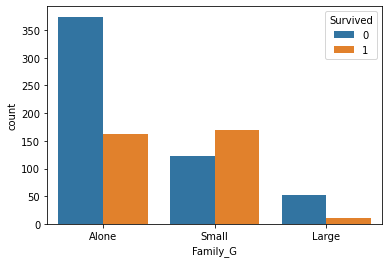

In [51]:
sns.countplot(data = tr,
             x = 'Family_G',
             hue = 'Survived')

## 이름 특성공학

In [52]:
tr['Name']

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [53]:
tr['Name'][0]

'Braund, Mr. Owen Harris'

In [54]:
tr['Name'][0].split('.')

['Braund, Mr', ' Owen Harris']

In [55]:
tr['Name'][0].split('.')[0]

'Braund, Mr'

In [56]:
# .strip() 공백 제거
tr['Name'][0].split('.')[0].split(',')[1].strip()

'Mr'

In [57]:
def split_title(row):
    return row.split('.')[0].split(',')[1].strip()

In [58]:
tr['Name'].apply(split_title)

0        Mr
1       Mrs
2      Miss
3       Mrs
4        Mr
       ... 
886     Rev
887    Miss
888    Miss
889      Mr
890      Mr
Name: Name, Length: 891, dtype: object

In [59]:
# Title 이라는 새로운 변수 추가
tr['Title'] = tr['Name'].apply(split_title)

In [60]:
test['Title'] = test['Name'].apply(split_title)

In [61]:
# 호칭만 분리 완료
tr['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [62]:
tr['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Col               2
Major             2
Sir               1
Capt              1
Ms                1
Mme               1
Don               1
Lady              1
the Countess      1
Jonkheer          1
Name: Title, dtype: int64

- Mr  성인남자
- Mrs 결혼을 한 여성
- Ms 결혼 여부를 밝히고 싶지 않을 때 사용하는 호칭
- Miss 결혼을 하지 않은 여성
- Master 결혼을 하지 않은 남성(주로 청소년)
- Dr 의사

(0.0, 20.0)

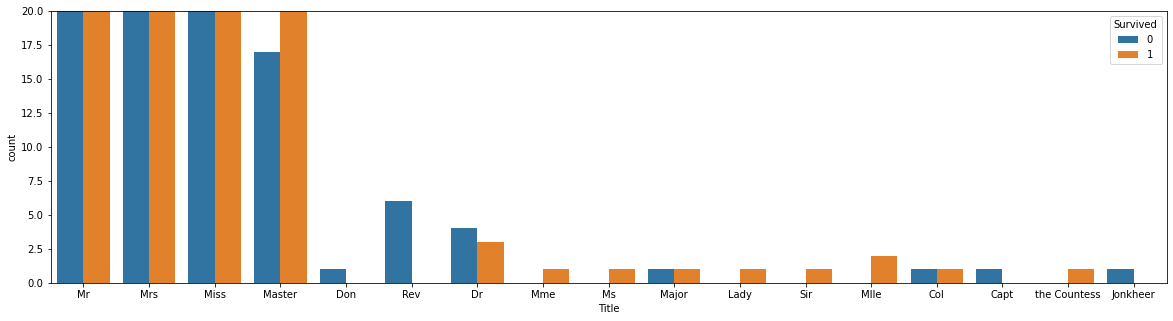

In [63]:
plt.figure(figsize = (20, 5))
sns.countplot(data = tr,
             x = 'Title',
             hue = 'Survived')
plt.ylim(0,20)

- Mr, Mrs, Miss : 성별과 관련된 호칭
- Master : 나이가 어린 남성(나이 시각화에서 얻은 지식과 관련)
- 나머지 호칭은 인원수가 적고 종류가 많기 때문에 통합

In [64]:
#map 함수 사용하기
title_dic = {
    'Mr' : 'Mr',
    'Mrs' : 'Mrs',
    'Miss' : 'Miss',
    'Master' : 'Master',
    'Mme' : 'Miss',
    'Lady' : 'Miss',
    'Ms' : 'Miss',
    'Don' : 'Other',
    'Rev' : 'Other',
    'Dr' : 'Other',
    'Major' : 'Other',
    'Sir' : 'Other',
    'Mlle' : 'Other',
    'Col' : 'Other',
    'Capt' : 'Other',
    'the Countess' : 'Other',
    'Jonkheer' : 'Other',
    'Dona' : 'Other',
}

In [65]:
tr['Title2'] = tr['Title'].map(title_dic)

In [66]:
tr['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

In [67]:
test['Title2'] = test['Title'].map(title_dic)
test['Title2'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

### 사용하지 않을 컬럼 정리

In [68]:
tr.columns # 'Name' , 'Title' , 'Ticket' 을 정리해보자 !

Index(['Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Cabin', 'Embarked', 'Survived', 'Family', 'Family_G', 'Title',
       'Title2'],
      dtype='object')

In [69]:
tr.drop(['Name' , 'Title' , 'Ticket'], axis =1, inplace= True )

In [70]:
test.drop(['Name' , 'Title' , 'Ticket'], axis =1, inplace= True)

In [71]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Pclass    891 non-null    int64   
 1   Sex       891 non-null    object  
 2   Age       891 non-null    float64 
 3   SibSp     891 non-null    int64   
 4   Parch     891 non-null    int64   
 5   Fare      891 non-null    float64 
 6   Cabin     891 non-null    object  
 7   Embarked  891 non-null    object  
 8   Survived  891 non-null    int64   
 9   Family    891 non-null    int64   
 10  Family_G  891 non-null    category
 11  Title2    891 non-null    object  
dtypes: category(1), float64(2), int64(5), object(4)
memory usage: 77.7+ KB


- 학습하기 전에 object형 타입이 있는경우 계산 불가능
- 숫자형 데이터로 변경해줘야한다
- 인코딩 필수 

In [72]:
tr.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked',
       'Survived', 'Family', 'Family_G', 'Title2'],
      dtype='object')

In [73]:
c_f = ['Sex','Cabin','Embarked','Family_G','Title2']

In [74]:
pd.get_dummies(tr['Title2'], prefix = 'Title2')

,Title2_Master,Title2_Miss,Title2_Mr,Title2_Mrs,Title2_Other
0,0,0,1,0,0
1,0,0,0,1,0
2,0,1,0,0,0
3,0,0,0,1,0
4,0,0,1,0,0
...,...,...,...,...,...
886,0,0,0,0,1
887,0,1,0,0,0
888,0,1,0,0,0
889,0,0,1,0,0


In [75]:
for i in c_f:
    one_hot = pd.get_dummies(tr[i], prefix = i)
    tr.drop(i, axis = 1, inplace = True) # 기존 object 컬럼 제거
    tr = pd.concat([tr, one_hot], axis = 1) # 기존데이터와 원핫인코딩한 데이터프레임 합치기

In [76]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          891 non-null    int64  
 1   Age             891 non-null    float64
 2   SibSp           891 non-null    int64  
 3   Parch           891 non-null    int64  
 4   Fare            891 non-null    float64
 5   Survived        891 non-null    int64  
 6   Family          891 non-null    int64  
 7   Sex_female      891 non-null    uint8  
 8   Sex_male        891 non-null    uint8  
 9   Cabin_A         891 non-null    uint8  
 10  Cabin_B         891 non-null    uint8  
 11  Cabin_C         891 non-null    uint8  
 12  Cabin_D         891 non-null    uint8  
 13  Cabin_E         891 non-null    uint8  
 14  Cabin_F         891 non-null    uint8  
 15  Cabin_G         891 non-null    uint8  
 16  Cabin_M         891 non-null    uint8  
 17  Cabin_T         891 non-null    uin

In [77]:
for i in c_f:
    one_hot = pd.get_dummies(test[i], prefix = i)
    test.drop(i, axis = 1, inplace = True) # 기존 object 컬럼 제거
    test = pd.concat([test, one_hot], axis = 1) # 기존데이터와 원핫인코딩한 데이터프레임 합치기

In [78]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Pclass          418 non-null    int64  
 1   Age             418 non-null    float64
 2   SibSp           418 non-null    int64  
 3   Parch           418 non-null    int64  
 4   Fare            418 non-null    float64
 5   Family          418 non-null    int64  
 6   Sex_female      418 non-null    uint8  
 7   Sex_male        418 non-null    uint8  
 8   Cabin_A         418 non-null    uint8  
 9   Cabin_B         418 non-null    uint8  
 10  Cabin_C         418 non-null    uint8  
 11  Cabin_D         418 non-null    uint8  
 12  Cabin_E         418 non-null    uint8  
 13  Cabin_F         418 non-null    uint8  
 14  Cabin_G         418 non-null    uint8  
 15  Cabin_M         418 non-null    uint8  
 16  Embarked_C      418 non-null    uint8  
 17  Embarked_Q      418 non-null    uin

In [79]:
set(tr.columns) - set (test.columns)

{'Cabin_T', 'Survived'}

In [80]:
test.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Family', 'Sex_female',
       'Sex_male', 'Cabin_A', 'Cabin_B', 'Cabin_C', 'Cabin_D', 'Cabin_E',
       'Cabin_F', 'Cabin_G', 'Cabin_M', 'Embarked_C', 'Embarked_Q',
       'Embarked_S', 'Family_G_Alone', 'Family_G_Small', 'Family_G_Large',
       'Title2_Master', 'Title2_Miss', 'Title2_Mr', 'Title2_Mrs',
       'Title2_Other'],
      dtype='object')

In [81]:
# test 데이터에 Cabin_T 가 없기 때문에 tr 데이터에서도 삭제
# 다음에 다시 set - set 연산
tr.drop('Cabin_T', axis = 1 , inplace= True)

In [82]:
X_train = tr.drop('Survived', axis= 1)
y_train = tr['Survived']

In [83]:
X_train.shape, y_train.shape

((891, 27), (891,))

In [84]:
X_test = test

In [85]:
X_test.shape

(418, 27)

## 모델설계

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [87]:
K_model = KNeighborsClassifier()
t_model = DecisionTreeClassifier()

#### train , validation 분리 

데이터를 훈련세트와 테스트세트로 분리 할 때 인덱스 순서대로 분리하면 데이터 불균형 문제가 발생, 이를 해결하기 위해 난수를 이용해 추출하는 방식 - 랜덤샘플링

In [88]:
# X_train.shape (891, 27) -> 7 : 3 으로 다시 분리
from sklearn.model_selection import train_test_split

In [89]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train)

In [90]:
X_train.shape

(668, 27)

In [91]:
X_val.shape

(223, 27)

In [92]:
# 학습하기
K_model.fit(X_train, y_train)
t_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [93]:
#평가
K_model.score(X_val, y_val)

0.7040358744394619

In [94]:
# tree 모델로 검증하는게 정확도가 조금더 좋은것을 알수 있음
t_model.score(X_val, y_val)

0.7713004484304933

## 교차검증

In [95]:
from sklearn.model_selection import cross_val_score

In [96]:
k_result = cross_val_score(K_model, X_train, y_train, cv = 5)
k_result

array([0.7238806 , 0.70895522, 0.74626866, 0.67669173, 0.71428571])

In [97]:
t_result = cross_val_score(t_model, X_train, y_train, cv = 5)
t_result

array([0.81343284, 0.75373134, 0.75373134, 0.80451128, 0.83458647])

### 하이퍼파라미터튜닝

In [98]:
score_list = []
for i in range(1, 50):
    K_model = KNeighborsClassifier(n_neighbors = i)
    k_result = cross_val_score(K_model, X_train, y_train, cv = 5)
    #k_result 평균값을 리스트에 넣어 주겟다!
    score_list.append(k_result.mean())

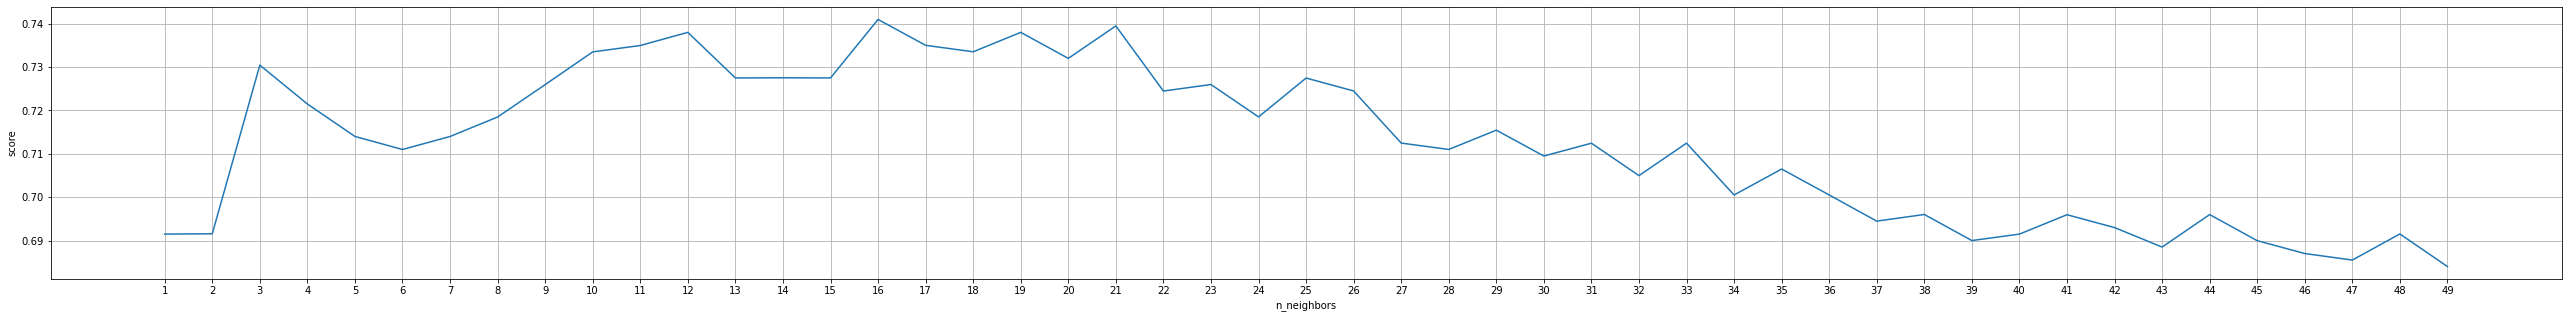

In [99]:
plt.figure(figsize = (45, 5))
#plt.plot(x축값, y축값) -> 그래프를 그리는 함수
#x축값 = 1~49가 나오는 함수 , y축값 = score_list
plt.plot(range(1, 50), score_list)
plt.xticks(range(1,50))
plt.grid()
plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.show()

In [100]:
score_list[9]

0.7334979239142633

K값의 최적은 9이다.

In [101]:
score_list2 = []
for i in range(1, 50):
    t_model = DecisionTreeClassifier(max_depth = i)
    t_result = cross_val_score(t_model, X_train, y_train, cv = 5)
    score_list2.append(t_result.mean())

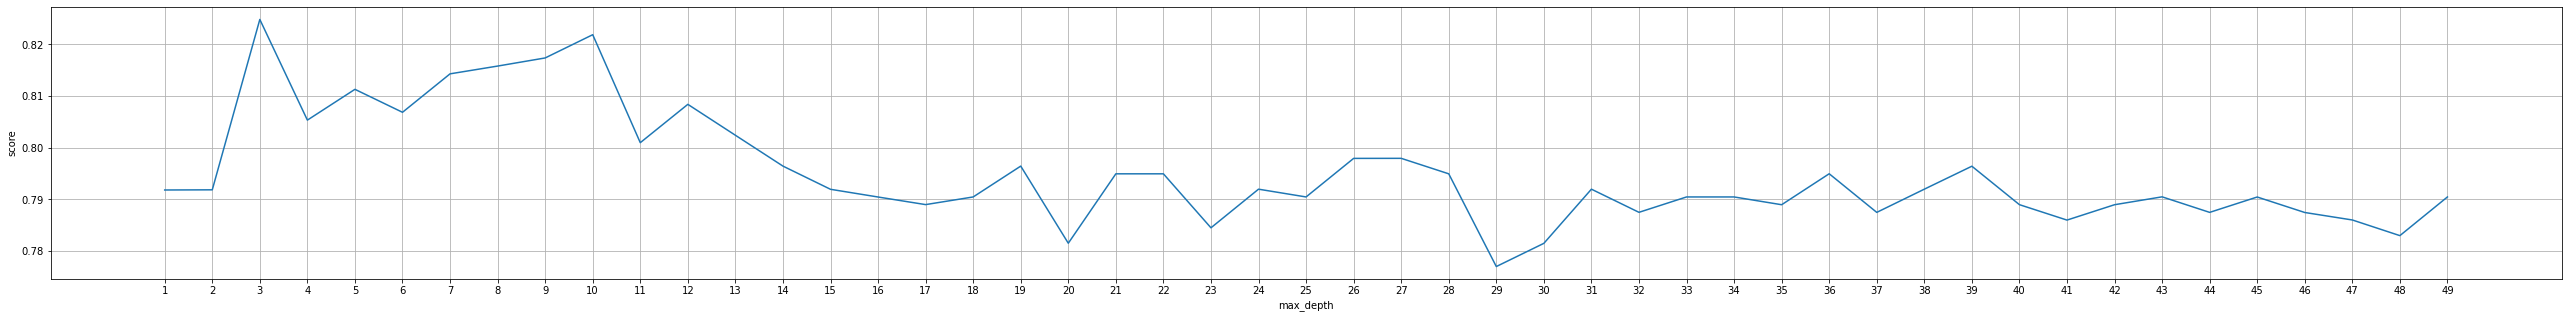

In [102]:
plt.figure(figsize = (45, 5))
plt.plot(range(1, 50), score_list2)
plt.xticks(range(1,50))
plt.grid()
plt.xlabel('max_depth')
plt.ylabel('score')
plt.show()

In [103]:
#max_depth 8일때 최적
score_list2[8]

0.817383009763214

In [104]:
final_knn = KNeighborsClassifier(n_neighbors = 9)
final_tree = DecisionTreeClassifier(max_depth= 8)

In [105]:
final_knn.fit(X_train, y_train)
final_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [106]:
k_pre = final_knn.predict(X_test)
t_pre = final_tree.predict(X_test)

### 예측결과 저장하기

In [107]:
submission = pd.read_csv('./data/titanic/gender_submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [108]:
submission['Survived'] = k_pre

In [109]:
submission.to_csv('knn_submission01.csv', index=False)

## 성능 개선을 위해 고려해볼 사항

- feature selection(특성 선택)
- 데이터 확보 
- 전처리작업 변경(결측치, 특성공학, 스케일링)
- 모델 변경 -앙상블

### RandomForest 모델 학습하기

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
forest = RandomForestClassifier()

In [112]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [113]:
forest.score(X_val, y_val)

0.7757847533632287

### GradientBosstion 모델 학습하기

In [114]:
from sklearn.ensemble import GradientBoostingClassifier

In [115]:
gbc = GradientBoostingClassifier()

In [116]:
gbc.fit(X_train, y_train)

GradientBoostingClassifier()

In [117]:
gbc.score(X_val, y_val)

0.8026905829596412

### 그리드 서치 사용

In [118]:
from sklearn.model_selection import GridSearchCV

In [122]:
param = {
    'max_depth' : [5,10,15,20],
    'n_estimators' : [100,150,200,250],
    'max_features' : [0.5, 0.7]
}

In [123]:
# 위에서 만든 RandomForest 모델의 forest
grid = GridSearchCV(forest, param, cv=3)

In [124]:
grid.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15, 20],
                         'max_features': [0.5, 0.7],
                         'n_estimators': [100, 150, 200, 250]})

In [125]:
#파라미터 조합중에 가장 높은 성능
grid.best_score_

0.8458032023054445

In [126]:
# 가장 높은 성능을 만들어낸 하이퍼파라미터 조합 확인 코드
grid.best_params_

{'max_depth': 5, 'max_features': 0.5, 'n_estimators': 200}